<h1>Author: Akhilesh Nalla</h1><br>
<h1>Data Science and Business Analytics Internship</h1><br>
<h1>The Sparks Foundation</h1>

    

<img src="image.png" width="240" height="240" align="center"/>


<h1>GRIPFEB21</h1><br>
<h1>Task: Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’</h1><br>
    

- As a security/defense analyst, try to find out the hot zone of terrorism.
- What all security issues and insights you can derive by EDA?
- Tool: Python
- Dataset: https://bit.ly/2TK5Xn5

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
dataset = pd.read_csv('global_terrorism1.csv',encoding='ISO-8859-1')
print("Data imported successfully")

Data imported successfully


In [4]:
#printing head( first few rows) of the dataset 
dataset.head()

,ï»¿eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
# renaming columns for easy understanding
dataset.rename(columns={'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country',
                   'provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                   'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                   'weaptype1_txt':'Weapon_type','motive':'Motive','city':'City','latitude':'Latitude','longitude':'Longitude'},inplace=True)
dataset.head()

,ï»¿eventid,Year,Month,Day,approxdate,Extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:

# deleting the unnecessary columns
dataset= dataset[['Year','Month','Extended','Day','Country','State','Region','City','Latitude','Longitude',
                 'AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
dataset.head()

,Year,Month,Extended,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,0,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [7]:
#the total no of rows and columns
dataset.shape

(181691, 19)

In [8]:

#checking for any null values
dataset.isnull().sum()

Year                0
Month               0
Extended            0
Day                 0
Country             0
State             421
Region              0
City              434
Latitude         4556
Longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

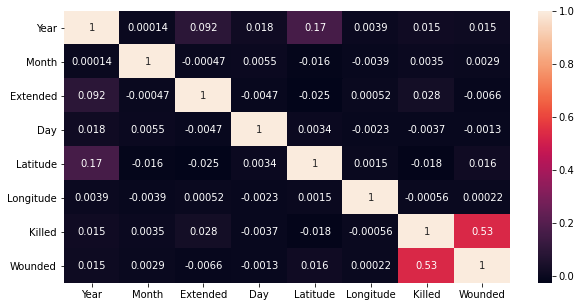

In [9]:
# finding the pairwise correlations between the columns and visualising using heatmaps
plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

<h2>Top 10 Countries with most terrorist attack</h2>

In [11]:
print("Country with the most attacks:\n",dataset['Country'].value_counts().head(10))

Country with the most attacks:
 Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64


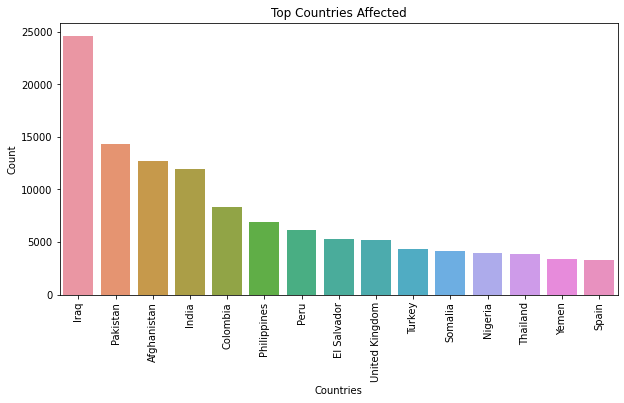

In [12]:

plt.figure(figsize = (10,5))
sns.barplot(dataset['Country'].value_counts()[:15].index,dataset['Country'].value_counts()[:15].values)
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

Hence, Countries with most attacks is <b>Iraq</b>.

<h2>States with most Terrorist attacks.</h2>

In [13]:

print('State with the most attacks:\n',dataset['State'].value_counts())

State with the most attacks:
 Baghdad                               7645
Northern Ireland                      4498
Unknown                               4290
Balochistan                           3710
Saladin                               3411
                                      ... 
Mayo (district), Ban Dan (village)       1
Burgos                                   1
Santiago del Estero                      1
Tavush                                   1
Veracruz (State)                         1
Name: State, Length: 2855, dtype: int64


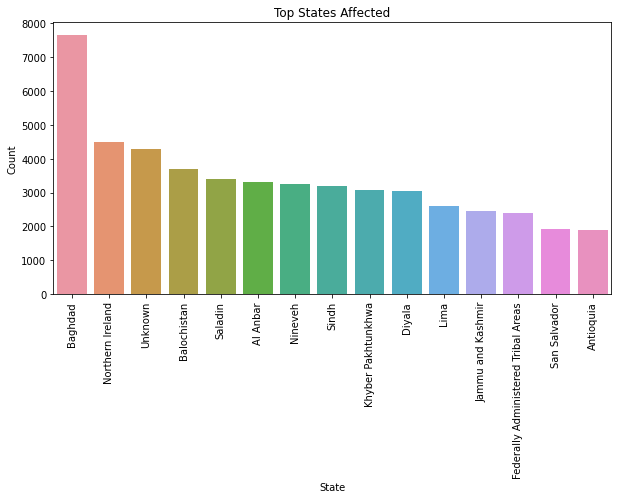

In [14]:

plt.figure(figsize = (10,5))
sns.barplot(dataset['State'].value_counts()[:15].index,dataset['State'].value_counts()[:15].values)
plt.title('Top States Affected')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

Most affected state is <b>Baghdad</b>

<h2>Regions with most Terrorist Attacks.</h2>

In [15]:

print("Region with the most attacks: \n",dataset['Region'].value_counts())

Region with the most attacks: 
 Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64


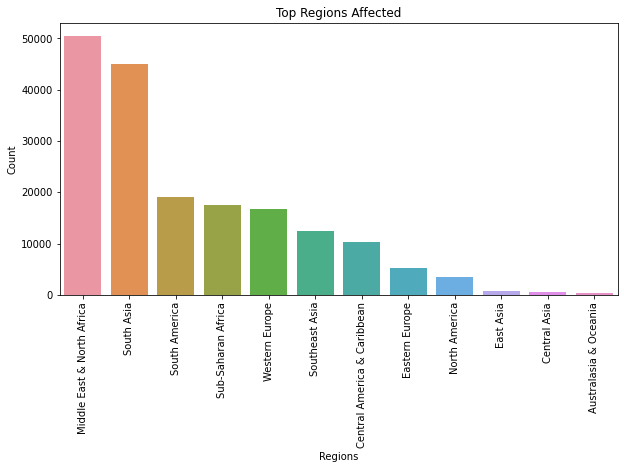

In [16]:
plt.figure(figsize = (10,5))
sns.barplot(dataset['Region'].value_counts()[:15].index,dataset['Region'].value_counts()[:15].values)
plt.title('Top Regions Affected')
plt.xlabel('Regions')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

The most effected region is <b>Middle East and North Africa</b>.

<h2>Cities with most terrorist attacks</h2>

In [17]:

print("Cities with the most attacks: \n",dataset['City'].value_counts())

Cities with the most attacks: 
 Unknown                 9775
Baghdad                 7589
Karachi                 2652
Lima                    2359
Mosul                   2265
                        ... 
Sre Ambel                  1
Akhvakhskiy district       1
La Durrera                 1
Pervomaiskyi               1
Shekhawala                 1
Name: City, Length: 36674, dtype: int64


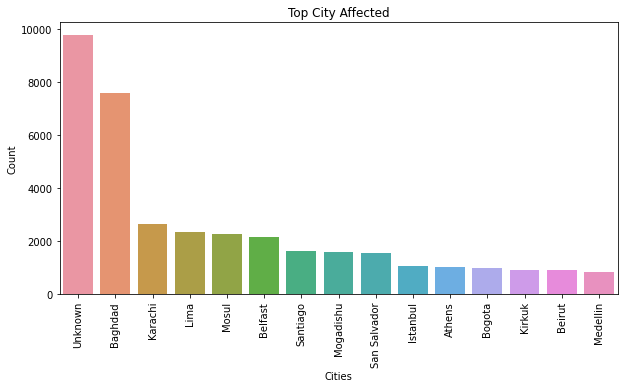

In [18]:
plt.figure(figsize = (10,5))
sns.barplot(dataset['City'].value_counts()[:15].index,dataset['City'].value_counts()[:15].values)
plt.title('Top City Affected')
plt.xlabel('Cities')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

City with most terrorist attacks is <b>Baghdad</b> neglecting unknown.

<h2>Years with most terrorist activity</h2>


In [20]:
print("Year with the most attacks:\n",dataset['Year'].value_counts().head(10))

Year with the most attacks:
 2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
Name: Year, dtype: int64


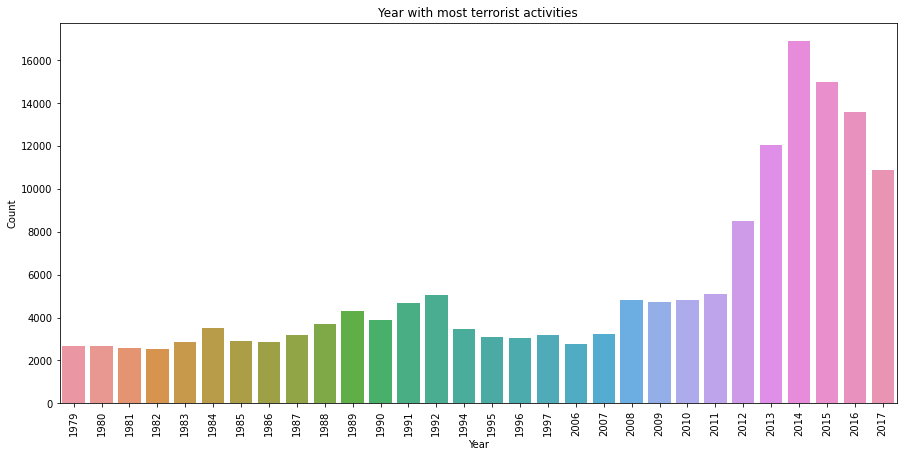

In [21]:

plt.figure(figsize = (15,7))
sns.barplot(dataset['Year'].value_counts()[:30].index,dataset['Year'].value_counts()[:30].values)
plt.title('Year with most terrorist activities')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

Year with most attacks is <b>2014</b>.

<h2>Most frequent attack type.</h2>

In [23]:

print("Most Frequent Attack Types:\n",dataset['AttackType'].value_counts())

Most Frequent Attack Types:
 Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64


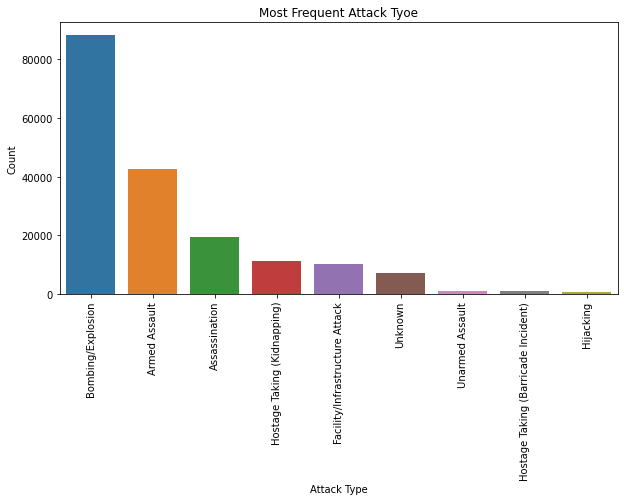

In [24]:
plt.figure(figsize = (10,5))
sns.barplot(dataset['AttackType'].value_counts()[:15].index,dataset['AttackType'].value_counts()[:15].values)
plt.title('Most Frequent Attack Tyoe')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

<b>Bombing/Explosion</b> is the most frequent attack type.

<h2>Most frequent groups involved in terrorist activity</h2>

In [25]:
print("Group with the most attacks:\n",dataset['Group'].value_counts().head())

Group with the most attacks:
 Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Name: Group, dtype: int64


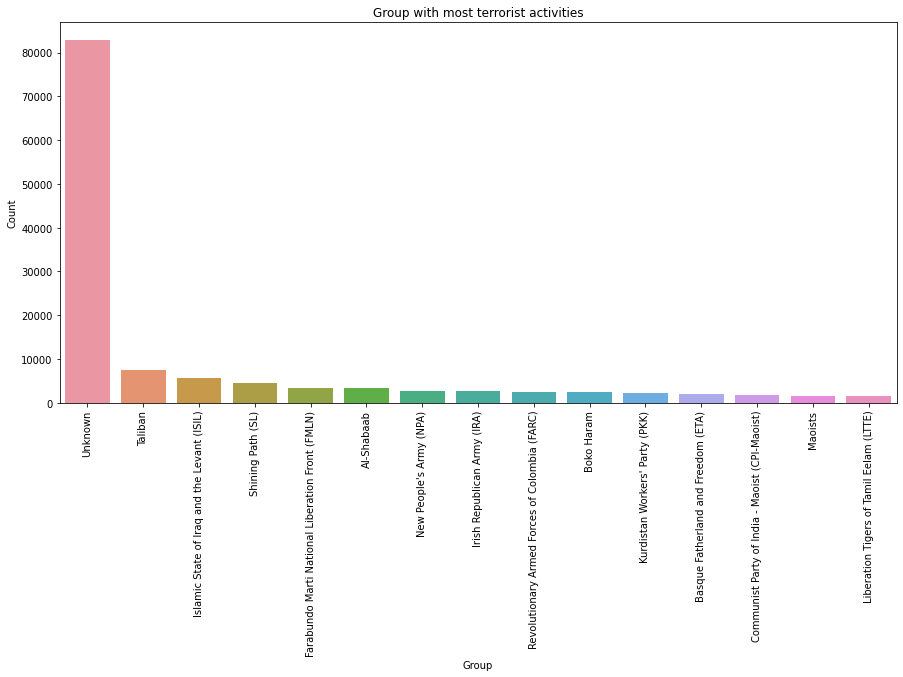

In [26]:
plt.figure(figsize = (15,7))
sns.barplot(dataset['Group'].value_counts()[:15].index,dataset['Group'].value_counts()[:15].values)
plt.title('Group with most terrorist activities')
plt.xlabel('Group')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

<b>Taliban</b> is the most active terrorist group neglecting unknown.

<h2>Killed vs Wounded visualisation</h2> 

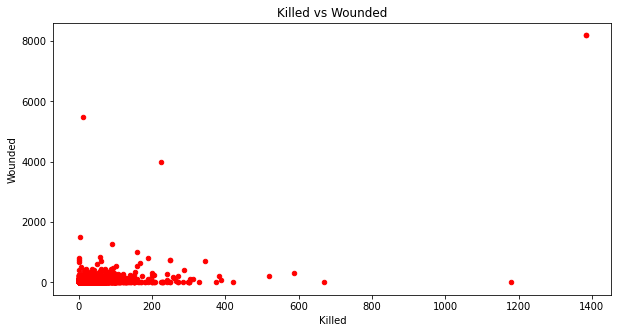

In [33]:
dataset.plot(kind = 'scatter', x = 'Killed', y = 'Wounded', alpha = 1.0, color = 'red', figsize = (10,5))
plt.xlabel('Killed')
plt.ylabel('Wounded')
plt.title('Killed vs Wounded')
plt.show()

<h2>Conclusion</h2>
1) Most affected country: <b>Iraq</b><br>
2) Most affected state: <b>Baghdad</b><br>
3) Most affected region: <b>Middle East and North africa</b><br>
4) Most affected city: <b>Baghdad</b><br>
5) Year with most terrorist activity: <b>2014</b><br>
6) Most frequent attack type: <b>Bombing/Explosion</b><br>
7) Most active terrorist group: <b>Taliban</b><br>

<h2>Inference</h2>
1) Areas with maximum terrorist activity is primarily in Middle East region and Taliban plays one of the biggest role in it. <br>
2) Most frequent attack type is bombing and explosion. More people have to be guided through about what happens when an explosion takes place and take necessary precaution. <br>
Also, Security personnel have to be more careful with bombers and have strong security checkings at public and important places.